## Code Initialization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import math, cmath, random
import numpy as np
import sympy as sp
sp.init_printing(use_unicode=True)

## Functions

In [2]:
def reset_pts(n=4):
    
    points = []
    
    for k in range(n):
        arg = k*2*math.pi/n
        points.append(complex(math.cos(arg), math.sin(arg)))
    
    return points

def reorder(pts, new_order):
    return [pts[i] for i in new_order]

def convert_to_coords(pts):
    return [p.real for p in pts], [p.imag for p in pts]

In [3]:
def simulate(start_pts, step_size=0.0001, stop_distance=0.0005, return_center=False):
    
    n_pts = len(start_pts)
    current_pts = [p for p in start_pts]
    paths = [[start_pts[k]] for k in range(n_pts)]
    center = sum(start_pts) / n_pts
    
    while True:
        for k in range(n_pts):
            if k == 0:
                last_target = current_pts[0]
                # store pos of first point, else last point will step towards updated pos of first point

            if k == n_pts - 1:
                target = last_target
            else:
                target = current_pts[k+1]
            
            step = (target - current_pts[k]) * step_size
            current_pts[k] += step
            
            paths[k].append(current_pts[k])
        
        if all(abs(p - center) < stop_distance for p in current_pts) or any(abs(p - center) > 10 for p in current_pts):
            break
    
    path_coords = [convert_to_coords(paths[k]) for k in range(n_pts)]
    
    if return_center:
        center_coords = [center.real, center.imag]
        
        return path_coords, center_coords
    else:
        return path_coords


In [4]:
def derivative(coords, degree=1, step=0.0001):
    
    for i in range(degree):
        deriv_coords = []
        
        for x, y in coords:
            x_deriv = [(x[j+1] - x[j]) / step for j in range(len(x)-1)]
            y_deriv = [(y[j+1] - y[j]) / step for j in range(len(x)-1)]

            deriv_coords.append((x_deriv, y_deriv))
        
        coords = [deriv_coords[k] for k in range(len(deriv_coords))]
    
    return deriv_coords


In [5]:
def graph(
    paths=[],
    points=[],
    color='b',
    c_dot=[],
    axis_lim=[-1.25, 1.25],
    tick=6,
    save=''
):
    
    plt.axis('square')
    plt.xlim(*axis_lim)
    plt.ylim(*axis_lim)
    plt.locator_params(axis='both', nbins=tick, integer=False)
    
    for path in paths:
        plt.plot(*path, color+',')
        
    if points:
        plt.plot(*points, 'go')
    
    if c_dot:
        plt.plot(*c_dot, 'ro')
    
    if save:
        plt.savefig('Desktop/EE/Graphs/'+save, format='eps', bbox_inches='tight')


In [6]:
def parametric(x_func, y_func, t_init=0, t_fin=10, t_step=0.0001):
    
    coordinates = ([], [])
    
    for t in [t_init + i*t_step for i in range(math.ceil((t_fin-t_init)/t_step))]:
        coordinates[0].append(x_func(t))
        coordinates[1].append(y_func(t))
    
    return coordinates


In [7]:
def max_discrepancy(coords1, coords2):
    
    max_discr = 0
    
    for path1, path2 in zip(coords1, coords2):
        for n in range(min(len(path1), len(path2))):
            x_discr = abs(path1[0][n] - path2[0][n])
            y_discr = abs(path1[1][n] - path2[1][n])

            discr = math.sqrt(x_discr ** 2 + y_discr ** 2)
            if discr > max_discr:
                max_discr = discr

    return max_discr

## Simulations

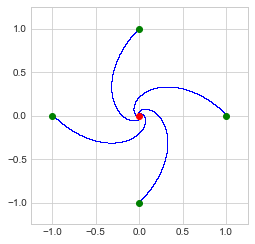

In [8]:
points = reset_pts()
pt_coords = convert_to_coords(points)
spi_pa_coords, c = simulate(points, return_center=True)

graph(spi_pa_coords, pt_coords, c_dot=c)

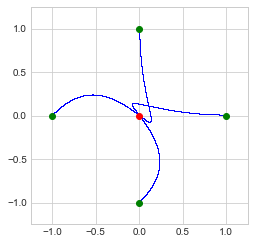

In [9]:
points = reset_pts()
points = reorder(points, [0, 2, 1, 3])
pt_coords = convert_to_coords(points)
pa_coords, c = simulate(points, return_center=True)

graph(pa_coords, pt_coords, c_dot=c)

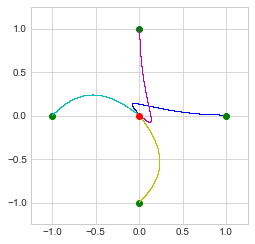

In [10]:
graph([pa_coords[0]], pt_coords)
graph([pa_coords[1]], color='c')
graph([pa_coords[2]], color='m')
graph([pa_coords[3]], color='y', c_dot=c)

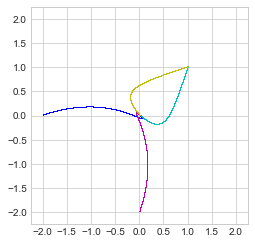

In [11]:
deriv_coords = derivative(pa_coords)

graph([deriv_coords[0]])
graph([deriv_coords[1]], color='c')
graph([deriv_coords[2]], color='m')
graph([deriv_coords[3]], color='y', axis_lim=[-2.25, 2.25], tick=10)


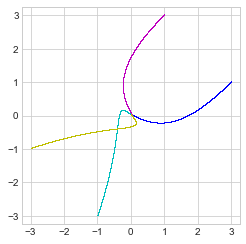

In [12]:
deriv2_coords = derivative(deriv_coords)

graph([deriv2_coords[0]])
graph([deriv2_coords[1]], color='c')
graph([deriv2_coords[2]], color='m')
graph([deriv2_coords[3]], color='y', axis_lim=[-3.25, 3.25], tick=8)


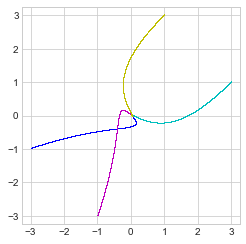

In [13]:
new_pa_coords = [(
    [-3*x_coord-y_coord for x_coord, y_coord in zip(x, y)],
    [-x_coord-3*y_coord for x_coord, y_coord in zip(x, y)]
) for x, y in pa_coords]

graph([new_pa_coords[0]])
graph([new_pa_coords[1]], color='c')
graph([new_pa_coords[2]], color='m')
graph([new_pa_coords[3]], color='y', axis_lim=[-3.25, 3.25], tick=8)


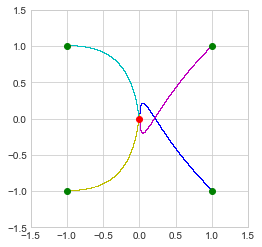

In [14]:
points = [complex(1, -1), complex(-1, 1), complex(1, 1), complex(-1, -1)]
rot_pt_coords = convert_to_coords(points)
rot_pa_coords, c = simulate(points, return_center=True)

graph([rot_pa_coords[0]])
graph([rot_pa_coords[1]], color='c')
graph([rot_pa_coords[2]], color='m')
graph([rot_pa_coords[3]], rot_pt_coords, color='y', c_dot=c, axis_lim=[-1.5, 1.5])

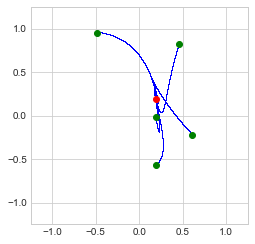

In [15]:
points = [complex(random.uniform(-1, 1), random.uniform(-1, 1)) for k in range(5)]
rand_pa_coords, c = simulate(points, return_center=True)
rand_pt_coords = convert_to_coords(points)

graph(rand_pa_coords, rand_pt_coords, c_dot=c)
# image generated here may not the same as the one used in the paper, as it is random each time

## Calculations

### Plots of Parametrics

Spiral parametrics:

\begin{align*}
r &= e^{-t}e^{it} \\
r &= e^{-t}e^{i\left(t+\frac{\pi}{2}\right)} \\
r &= e^{-t}e^{i\left(t+\pi\right)} \\
r &= e^{-t}e^{i\left(t+\frac{3\pi}{2}\right)}. \\
\end{align*}

In rectangular form:

\begin{align*}
r &= e^{-t}\cos t + ie^{-t}\sin t) \\
r &= e^{-t}\cos\left(t+\frac{\pi}{2}\right) + ie^{-t}\sin\left(t+\frac{\pi}{2}\right) \\
r &= e^{-t}\cos(t+\pi) + ie^{-t}\sin(t+\pi) \\
r &= e^{-t}\cos\left(t+\frac{3\pi}{2}\right) + ie^{-t}\sin\left(t+\frac{3\pi}{2}\right).
\end{align*}

Substitute trig functions:

\begin{align*}
r &= e^{-t}\cos t + ie^{-t}\sin t \\
r &= -e^{-t}\sin t + ie^{-t}\cos t \\
r &= -e^{-t}\cos t - ie^{-t}\sin t \\
r &= e^{-t}\sin t - ie^{-t}\cos t.
\end{align*}

In [16]:
def x_1(t):
    return math.e ** (-t) * math.cos(t)

def y_1(t):
    return math.e ** (-t) * math.sin(t)

def x_2(t):
    return -math.e ** (-t) * math.sin(t)

def y_2(t):
    return math.e ** (-t) * math.cos(t)

def x_3(t):
    return -math.e ** (-t) * math.cos(t)

def y_3(t):
    return -math.e ** (-t) * math.sin(t)

def x_4(t):
    return math.e ** (-t) * math.sin(t)

def y_4(t):
    return -math.e ** (-t) * math.cos(t)

Plot parametrics and check discrepancy with simulation

Maximum Discrepancy:  9.999666672212565e-09


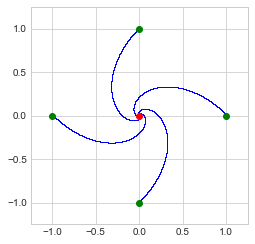

In [17]:
plot_coords = [
    parametric(x_1, y_1),
    parametric(x_2, y_2),
    parametric(x_3, y_3),
    parametric(x_4, y_4)
]

init_pts = convert_to_coords(reset_pts())

graph(plot_coords, init_pts, c_dot=[0, 0])

print("Maximum Discrepancy: ", max_discrepancy(plot_coords, spi_pa_coords))

Switched parametrics:

\begin{align*}
f_1(t) &= \frac{1}{2}e^{-t}\left(e^{-t} + \cos t - \sin t + \left(e^{-t} - \cos t + \sin t\right)i\right) \\
f_2(t) &= \frac{1}{2}e^{-t}\left(-e^{-t} - \cos t - \sin t + \left(-e^{-t} + \cos t + \sin t\right)i\right) \\
f_3(t) &= \frac{1}{2}e^{-t}\left(e^{-t} - \cos t + \sin t + \left(e^{-t} + \cos t - \sin t\right)i\right) \\
f_4(t) &= \frac{1}{2}e^{-t}\left(-e^{-t} + \cos t + \sin t + \left(-e^{-t} - \cos t - \sin t\right)i\right), \\
\end{align*}

In [25]:
def x_1(t):
    return (math.e ** (-t) + math.cos(t) - math.sin(t)) * (math.e ** (-t)) / 2

def y_1(t):
    return (math.e ** (-t) - math.cos(t) + math.sin(t)) * (math.e ** (-t)) / 2

def x_2(t):
    return (-math.e ** (-t) - math.cos(t) - math.sin(t)) * (math.e ** (-t)) / 2

def y_2(t):
    return (-math.e ** (-t) + math.cos(t) + math.sin(t)) * (math.e ** (-t)) / 2

def x_3(t):
    return (math.e ** (-t) - math.cos(t) + math.sin(t)) * (math.e ** (-t)) / 2

def y_3(t):
    return (math.e ** (-t) + math.cos(t) - math.sin(t)) * (math.e ** (-t)) / 2

def x_4(t):
    return (-math.e ** (-t) + math.cos(t) + math.sin(t)) * (math.e ** (-t)) / 2

def y_4(t):
    return (-math.e ** (-t) - math.cos(t) - math.sin(t)) * (math.e ** (-t)) / 2

Maximum Discrepancy:  1.5810545038958803e-08


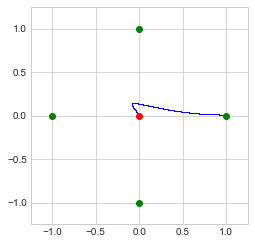

In [27]:
plot_coords = [
    parametric(x_1, y_1),
    parametric(x_2, y_2),
    parametric(x_3, y_3),
    parametric(x_4, y_4)
]

init_pts = convert_to_coords(reset_pts())

graph(plot_coords, init_pts, c_dot=[0, 0])

print("Maximum Discrepancy: ", max_discrepancy(plot_coords, pa_coords))

Check that the transformed graph matches the second derivative

In [20]:
reordered_new_pa_coords = reorder(new_pa_coords, [1, 2, 3, 0])

print("Maximum sum of diagonal components: ", max_discrepancy(reordered_new_pa_coords, deriv2_coords))

Maximum sum of diagonal components:  9.449103277614763e-09


Verify the diagonal components of $f_1(t)$ and $f_2(t)$ are equal and opposite

In [21]:
max_sum = 0

for a, b, c, d in zip(pa_coords[0][0], pa_coords[0][1], pa_coords[1][0], pa_coords[1][1]):
    s = abs(a + b + c + d)
    
    if s > max_sum:
        max_sum = s

print("Maximum sum of diagonal components: ", max_sum / math.sqrt(2))

Maximum sum of diagonal components:  1.785980171752794e-15


Matrix exponential for 5 points (will be the same for all systems of $5$ points, only the initial condition vector changes)

In [ ]:
t = sp.symbols('t')
A = sp.Matrix(t*np.array([[-1, 1, 0, 0, 0],[0, -1, 1, 0, 0],[0, 0, -1, 1, 0],[0, 0, 0, -1, 1],[1, 0, 0, 0, -1]]))
print(sp.simplify(sp.exp(A)))
# Have not run here as output is extremely long